In [ ]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops

image = cv2.imread('./need/black/img154.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

min_size = 15
max_size = 27
x,y = image.shape[:2]
#print(x,y)

offset = 5
x_filter = int((x)/offset)
y_filter = int((y)/offset)

co_contrast = np.zeros((x_filter ,y_filter))
co_homogeneity = np.zeros((x_filter ,y_filter))
co_correlation = np.zeros((x_filter ,y_filter))

for i in range(x):
    for j in range(y):
        if(image[i, j] <= 31):
            image[i, j] = 16
        
        elif(image[i, j] <= 63):
            image[i, j] = 47
        
        elif(image[i, j] <= 95):
            image[i, j] = 79

        elif(image[i, j] <= 127):
            image[i, j] = 111

        elif(image[i, j] <= 159):
            image[i, j] = 143

        elif(image[i, j] <= 191):
            image[i, j] = 175

        elif(image[i, j] <= 223):
            image[i, j] = 207

        else:
            image[i, j] = 239

for size_filter in range(min_size, max_size, 3):
    end_r = x - size_filter + offset
    end_c = y - size_filter + offset

    for i in range(0, end_r, offset):
        for j in range(0, end_c, offset):
            f = image[ i : i + size_filter , j : j + size_filter ]
            result = graycomatrix( f, [1],[0] )
            co_contrast[int(i/offset),int(j/offset)] = float(graycoprops(result, 'contrast'))
            co_homogeneity[int(i/offset),int(j/offset)] = float(graycoprops(result, 'homogeneity'))
            co_correlation[int(i/offset),int(j/offset)] = float(graycoprops(result, 'correlation'))


    #print mean(no error)
    '''
    homogeneity_mean = np.mean(co_homogeneity)
    contrast_mean = np.mean(co_contrast)
    correlation_mean = np.mean(co_correlation)
    print("homogeneity mean: %f seconds" % homogeneity_mean)
    print("contrast mean: %f seconds" % contrast_mean)
    print("correlation mean: %f seconds" % correlation_mean)
    '''

    for i in range(x_filter):
        for j in range(y_filter):
            if(size_filter < 18):
                if co_correlation[i,j] < 0.45:
                    if co_contrast[i,j] > 90:
                        if co_homogeneity[i,j] < 0.077:
                            cv2.rectangle(image,( j*offset , i*offset ),( j*offset+10 , i*offset+10 ) ,(255,0,0),2)
                            print("< 18", size_filter)

            else:
                if co_correlation[i,j] > 0.835:
                    if co_contrast[i,j] > 43:
                        if co_homogeneity[i,j] < 0.23:
                            cv2.rectangle(image,( j*offset , i*offset ),( j*offset+10 , i*offset+10 ) ,(255,0,0),2)
                            print("> 18", size_filter)


image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
plt.imshow(image)
plt.show()
cv2.imwrite("./result.png", image)


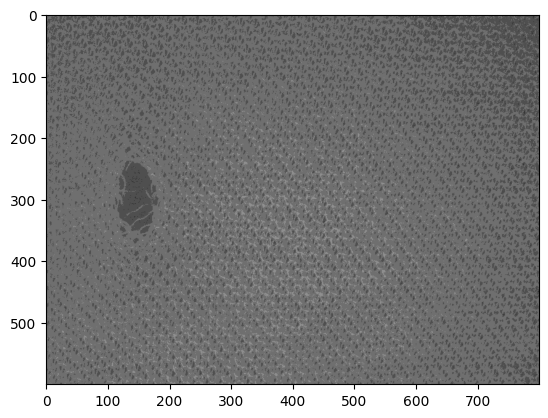

In [12]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops

image = cv2.imread('./need/black/img154.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

nr, nc = image.shape[:2]

for x in range(nr):
    for y in range(nc):
        if(image[x, y] <= 31):
            image[x, y] = 16
        
        elif(image[x, y] <= 63):
            image[x, y] = 47
        
        elif(image[x, y] <= 95):
            image[x, y] = 79

        elif(image[x, y] <= 127):
            image[x, y] = 111

        elif(image[x, y] <= 159):
            image[x, y] = 143

        elif(image[x, y] <= 191):
            image[x, y] = 175

        elif(image[x, y] <= 223):
            image[x, y] = 207

        else:
            image[x, y] = 239


image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
plt.imshow(image)
plt.show()

15


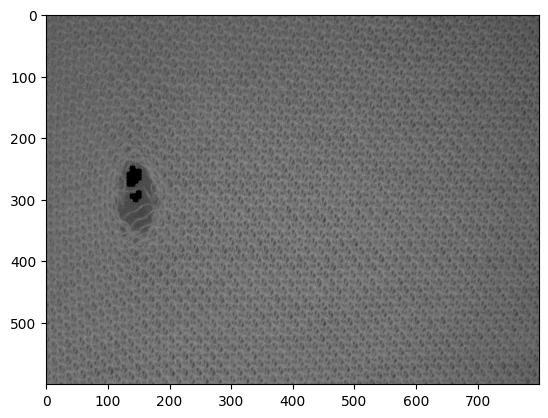

23


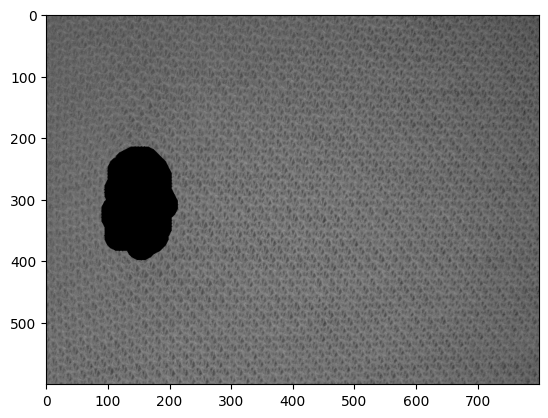

33


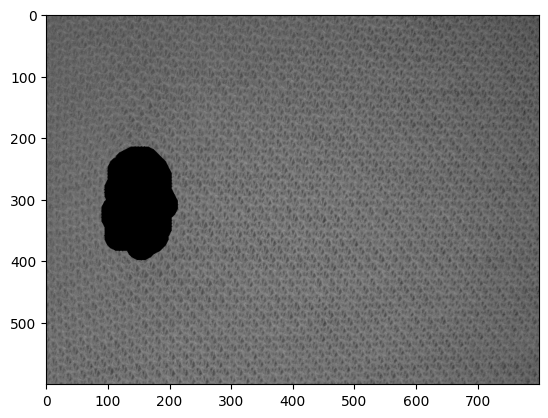

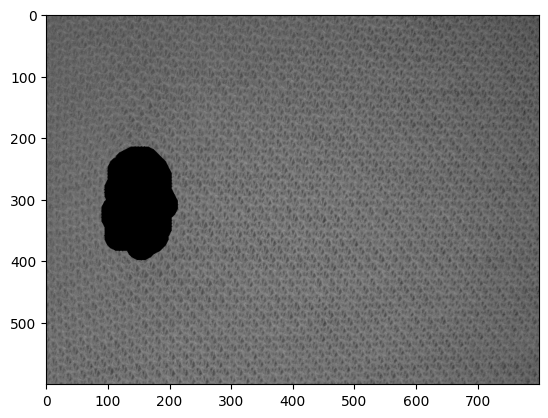

True

In [15]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops
import time

image = cv2.imread('./need/black/img154.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

min_size = 15
max_size = 33
#size_filter = 15
x, y = image.shape[:2]
#print(x,y)

new_img = image.copy()

offset = 5
x_filter = int((x)/offset)
y_filter = int((y)/offset)


for size_filter in range(min_size, max_size+1):

    if(size_filter == 15 or size_filter == 23 or size_filter == 33):
        print(size_filter)
        
        end_r = x - size_filter + offset
        end_c = y - size_filter + offset

        co_contrast = np.zeros((x_filter ,y_filter))
        co_homogeneity = np.zeros((x_filter ,y_filter))
        co_correlation = np.zeros((x_filter ,y_filter))

        for i in range(0, end_r, offset):
            for j in range(0, end_c, offset):
                f = image[ i : i + size_filter , j : j + size_filter ]
                result = graycomatrix( f, [1],[0] )
                co_contrast[int(i/offset),int(j/offset)] = float(graycoprops(result, 'contrast'))
                co_homogeneity[int(i/offset),int(j/offset)] = float(graycoprops(result, 'homogeneity'))
                co_correlation[int(i/offset),int(j/offset)] = float(graycoprops(result, 'correlation'))

        for i in range(0, x_filter):
            for j in range(0, y_filter):
                has_print = 0

                match size_filter:
                    case 15:
                        for k in range(0, 3):
                            if(has_print):
                                break

                            for l in range(0, 3):
                                if(new_img[i+k, j+l] == 0):
                                    has_print = 1
                                    break

                        if(not has_print):
                            if co_correlation[i,j] < 0.22:
                                if co_contrast[i,j] > 10:
                                    if co_homogeneity[i,j] < 0.28:
                                        cv2.circle(new_img,( j*offset+5 , i*offset+5 ),5 ,0,-1)

                    case 23:
                        for k in range(0, 13):
                            if(has_print):
                                break

                            for l in range(0, 13):
                                if(new_img[i+k, j+l] == 0):
                                    has_print = 1
                                    break

                        if(not has_print):
                            if co_correlation[i,j] > 0.809:
                                if co_contrast[i,j] > 42:
                                    if co_homogeneity[i,j] < 0.51:
                                        cv2.circle(new_img,( j*offset+14 , i*offset+14 ),25 ,0,-1)
                                    
                    case 33:
                        for k in range(0, 4):
                            if(has_print):
                                break

                            for l in range(0, 4):
                                if(new_img[i+k, j+l] == 0):
                                    has_print = 1
                                    break

                        if(not has_print):
                            if co_correlation[i,j] > 0.89:
                                cv2.circle(new_img,( j*offset+6 , i*offset+6 ),8 ,0,-1)

        plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_GRAY2RGB))
        plt.show()

        
        #print mean(no error)
        '''
        homogeneity_mean = np.mean(co_homogeneity)
        contrast_mean = np.mean(co_contrast)
        correlation_mean = np.mean(co_correlation)
        print("homogeneity mean: %f seconds" % homogeneity_mean)
        print("contrast mean: %f seconds" % contrast_mean)
        print("correlation mean: %f seconds" % correlation_mean)
        '''


image = cv2.cvtColor(new_img, cv2.COLOR_GRAY2RGB)
plt.imshow(image)
plt.show()
cv2.imwrite("./result.png", image)


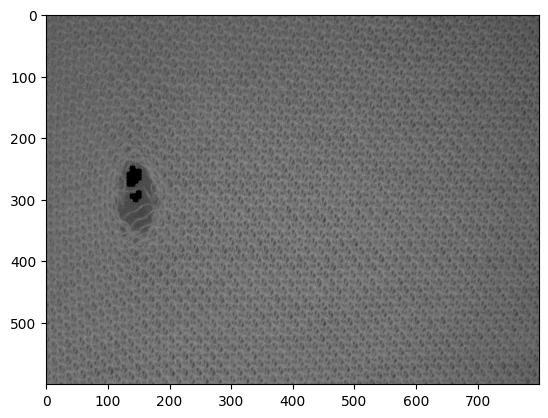

In [9]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops

image = cv2.imread('./need/black/img154.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

new_img = image.copy()

size_filter = 15
x,y = image.shape[:2]
#print(x,y)

offset = 5
x_filter = int((x)/offset)
y_filter = int((y)/offset)

co_contrast = np.zeros((x_filter ,y_filter))
co_homogeneity = np.zeros((x_filter ,y_filter))
co_correlation = np.zeros((x_filter ,y_filter))

end_r = x - size_filter + offset
end_c = y - size_filter + offset

for i in range(0, end_r, offset):
    for j in range(0, end_c, offset):
        f = image[ i : i + size_filter , j : j + size_filter ]
        result = graycomatrix( f, [1],[0] )
        co_contrast[int(i/offset),int(j/offset)] = float(graycoprops(result, 'contrast'))
        co_homogeneity[int(i/offset),int(j/offset)] = float(graycoprops(result, 'homogeneity'))
        co_correlation[int(i/offset),int(j/offset)] = float(graycoprops(result, 'correlation'))


#print mean(no error)
'''
homogeneity_mean = np.mean(co_homogeneity)
contrast_mean = np.mean(co_contrast)
correlation_mean = np.mean(co_correlation)
print("homogeneity mean: %f seconds" % homogeneity_mean)
print("contrast mean: %f seconds" % contrast_mean)
print("correlation mean: %f seconds" % correlation_mean)
'''

for i in range(x_filter):
    for j in range(y_filter):
        has_print = 0

        for x in range(3):
            if(has_print):
                break

            for y in range(3):
                if(new_img[i+x, j+y] == 0):
                    has_print = 1
                    break

        if(not has_print):
            if co_correlation[i,j] < 0.22:
                if co_contrast[i,j] > 10:  
                    if co_homogeneity[i,j] < 0.28:
                        cv2.circle(new_img,( j*offset+5 , i*offset+5 ),5 ,0,-1)

image = cv2.cvtColor(new_img, cv2.COLOR_GRAY2RGB)
plt.imshow(image)
plt.show()
#cv2.imwrite("./result.png", image)


23 ggggggg 47 100 0.6974164336149693 106.30830039525691 0.11919082629578591


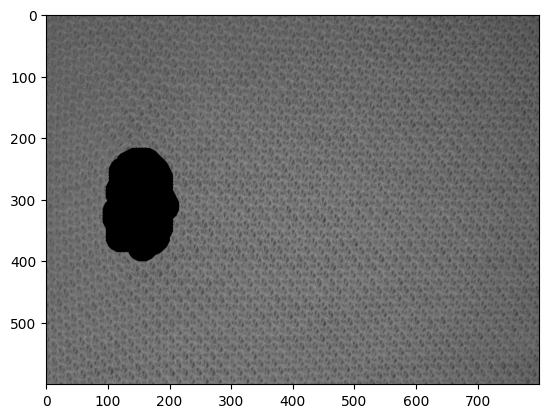

In [38]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops

image = cv2.imread('./need/black/img154.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

new_img = image.copy()

size_filter = 23
x,y = image.shape[:2]
#print(x,y)

offset = 5
x_filter = int((x)/offset)
y_filter = int((y)/offset)

co_contrast = np.zeros((x_filter ,y_filter))
co_homogeneity = np.zeros((x_filter ,y_filter))
co_correlation = np.zeros((x_filter ,y_filter))

end_r = x - size_filter + offset
end_c = y - size_filter + offset

for i in range(0, end_r, offset):
    for j in range(0, end_c, offset):
        f = image[ i : i + size_filter , j : j + size_filter ]
        result = graycomatrix( f, [1],[0] )
        co_contrast[int(i/offset),int(j/offset)] = float(graycoprops(result, 'contrast'))
        co_homogeneity[int(i/offset),int(j/offset)] = float(graycoprops(result, 'homogeneity'))
        co_correlation[int(i/offset),int(j/offset)] = float(graycoprops(result, 'correlation'))


#print mean(no error)
'''
homogeneity_mean = np.mean(co_homogeneity)
contrast_mean = np.mean(co_contrast)
correlation_mean = np.mean(co_correlation)
print("homogeneity mean: %f seconds" % homogeneity_mean)
print("contrast mean: %f seconds" % contrast_mean)
print("correlation mean: %f seconds" % correlation_mean)
'''

for i in range(x_filter):
    for j in range(y_filter):
        has_print = 0

        for x in range(13):
            if(has_print):
                break

            for y in range(13):
                if(new_img[i+x, j+y] == 0):
                    has_print = 1
                    break

        if(not has_print):
            if co_correlation[i,j] > 0.809:
                if co_contrast[i,j] > 42:
                    if co_homogeneity[i,j] < 0.51:
                        cv2.circle(new_img,( j*offset+16 , i*offset+16 ),25 ,0,-1)

        
        if(i == 47 and j == 100):
            print(size_filter, "ggggggg", i, j, co_correlation[i,j], co_contrast[i,j], co_homogeneity[i,j])
                        
image = cv2.cvtColor(new_img, cv2.COLOR_GRAY2RGB)
plt.imshow(image)
plt.show()
#cv2.imwrite("./result.png", image)


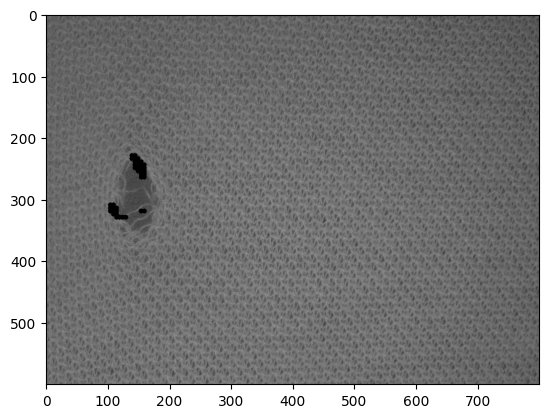

In [7]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops

image = cv2.imread('./need/black/img154.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

new_img = image.copy()

size_filter = 33
x,y = image.shape[:2]
#print(x,y)

offset = 5
x_filter = int((x)/offset)
y_filter = int((y)/offset)

co_contrast = np.zeros((x_filter ,y_filter))
co_homogeneity = np.zeros((x_filter ,y_filter))
co_correlation = np.zeros((x_filter ,y_filter))

end_r = x - size_filter + offset
end_c = y - size_filter + offset

for i in range(0, end_r, offset):
    for j in range(0, end_c, offset):
        f = image[ i : i + size_filter , j : j + size_filter ]
        result = graycomatrix( f, [1],[0] )
        co_contrast[int(i/offset),int(j/offset)] = float(graycoprops(result, 'contrast'))
        co_homogeneity[int(i/offset),int(j/offset)] = float(graycoprops(result, 'homogeneity'))
        co_correlation[int(i/offset),int(j/offset)] = float(graycoprops(result, 'correlation'))


#print mean(no error)
'''
homogeneity_mean = np.mean(co_homogeneity)
contrast_mean = np.mean(co_contrast)
correlation_mean = np.mean(co_correlation)
print("homogeneity mean: %f seconds" % homogeneity_mean)
print("contrast mean: %f seconds" % contrast_mean)
print("correlation mean: %f seconds" % correlation_mean)
'''

for i in range(x_filter):
    for j in range(y_filter):
        has_print = 0

        for x in range(2):
            if(has_print):
                break

            for y in range(2):
                if(new_img[i+x, j+y] == 0):
                    has_print = 1
                    break

        if(not has_print):
            if co_correlation[i,j] > 0.89:
                cv2.circle(new_img,( j*offset+4 , i*offset+4 ),4 ,0,-1)
                        
image = cv2.cvtColor(new_img, cv2.COLOR_GRAY2RGB)
plt.imshow(image)
plt.show()
#cv2.imwrite("./result.png", image)
